In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_37675_G')

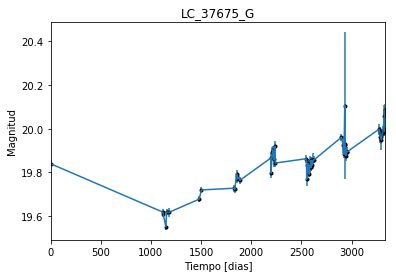

In [2]:
data = np.genfromtxt('LC_37675_G.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_37675_G')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

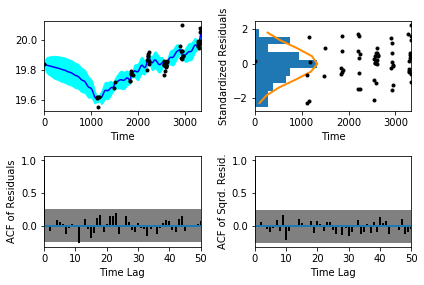

In [5]:
sample.assess_fit()

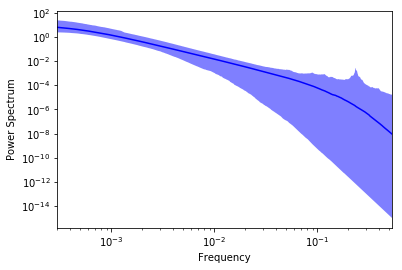

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_37675_G')

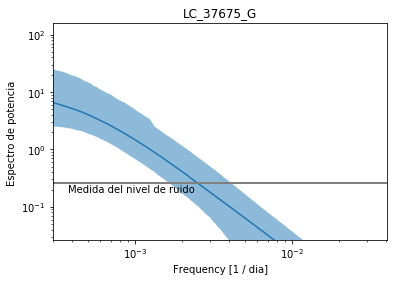

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_37675_G')

Text(0.5,1,'Prediccion , valor esperado LC_37675_G')

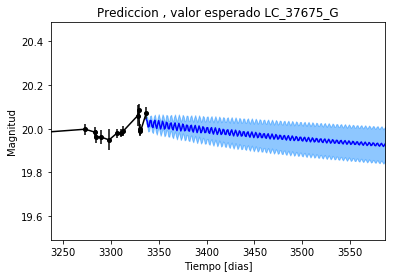

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_37675_G')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_37675_G')

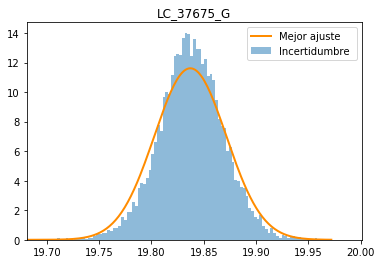

In [10]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_37675_G')

Text(0.5,1,'Interpolacion, camino simulado LC_37675_G')

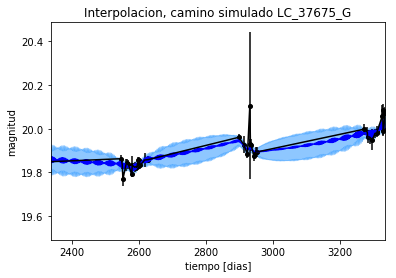

In [11]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_37675_G')

Text(0.5,1,'Interpolacion, camino simulado LC_37675_Z')

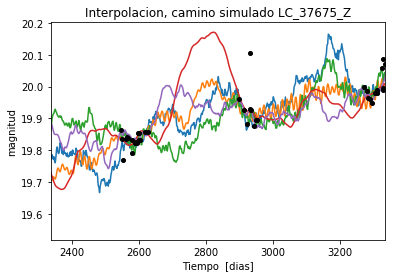

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_37675_Z')

In [13]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [14]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 574.594561057
Median: 0.0184265539496
Standard deviation: 0.203014785739
68% credibility interval: [ 0.00142413  0.21267474]
95% credibility interval: [  4.39350846e-04   7.94198271e-01]
99% credibility interval: [  3.30720139e-04   1.01198934e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 1117.24373873
Median: 0.00851442873454
Standard deviation: 0.0968748586846
68% credibility interval: [ 0.00062548  0.07680412]
95% credibility interval: [  3.32136386e-04   3.33643600e-01]
99% credibility interval: [  3.05761058e-04   6.47210197e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 541.364425468
Median: 0.135810836521


In [15]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 471.299767512
Median: 135.54588888
Standard deviation: 2.21651768727
68% credibility interval: [ 133.1439324   137.09632156]
95% credibility interval: [ 129.94410616  138.89976231]
99% credibility interval: [ 127.87371747  140.08610365]


In [16]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 385.931868116
Median: 1.66032687567
Standard deviation: 2.76727065274
68% credibility interval: [ 0.23485942  5.67282028]
95% credibility interval: [ 0.02301506  9.66328965]
99% credibility interval: [  0.01420589  11.76688385]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 437.827201835
Median: 3.40150502785
Standard deviation: 12.5359633935
68% credibility interval: [  0.41934634  22.11341592]
95% credibility interval: [  1.93677945e

In [17]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 20020.0310431
Median: 1.08051952653e-44
Standard deviation: 9.3116628666e+32
68% credibility interval: [  9.20852603e-93   4.06062161e-12]
95% credibility interval: [  1.03173128e-123   1.89004356e+000]
99% credibility interval: [  7.66361150e-144   3.73350803e+001]


In [18]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1828.20392274
Median: 19.8251022991
Standard deviation: 0.0581941771492
68% credibility interval: [ 19.773089    19.87954155]
95% credibility interval: [ 19.71422496  19.94256455]
99% credibility interval: [ 19.66269732  19.99940226]


In [19]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 1475.5486887
Median: 0.182777367523
Standard deviation: 0.288011961275
68% credibility interval: [ 0.          0.63513187]
95% credibility interval: [ 0.          0.95736834]
99% credibility interval: [ 0.          1.03354877]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 1475.5486887
Median: 0.182777367523
Standard deviation: 0.288011961275
68% credibility interval: [ 0.          0.63513187]
95% credibility interval: [ 0.          0.95736834]
99% credibility interval: [ 0.          1.03354877]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 240.360461573
Median: 0.0
Standard deviation: 0.000139870901546
68% credib

In [20]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 471.299767512
Median: 135.54588888
Standard deviation: 2.21651768727
68% credibility interval: [ 133.1439324   137.09632156]
95% credibility interval: [ 129.94410616  138.89976231]
99% credibility interval: [ 127.87371747  140.08610365]


In [21]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 438.169757206
Median: 0.0132846583346
Standard deviation: 0.0103325730291
68% credibility interval: [ 0.0089178   0.02095337]
95% credibility interval: [ 0.00645616  0.04484935]
99% credibility interval: [ 0.00509308  0.06068787]


In [22]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 801.739232796
Median: 1.13280024497
Standard deviation: 0.227668191355
68% credibility interval: [ 0.92680199  1.37742709]
95% credibility interval: [ 0.7675369   1.66550842]
99% credibility interval: [ 0.70075095  1.88307142]


In [23]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 283.106954221
Median: 0.0122024673683
Standard deviation: 0.240846518151
68% credibility interval: [ 0.00043287  0.13392405]
95% credibility interval: [  4.14712360e-06   8.62373221e-01]
99% credibility interval: [  2.92011912e-07   1.51191711e+00]


In [24]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 574.594561057
Median: (-0.115777453038-2.75386757877j)
Standard deviation: 2.21401738446
68% credibility interval: [-1.33627478-2.94094397j -0.00894810-0.48950878j]
95% credibility interval: [ -4.99009491e+00+0.j          -2.76052278e-03-0.88908358j]
99% credibility interval: [ -6.35851654e+00+0.j          -2.07797592e-03-0.22127012j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 1117.24373873
Median: (-0.0534977335239+0.350786342741j)
Standard deviation: 1.90925757435
68% credibility interval: [-0.48257451+2.35238698j -0.00393000+1.47747745j]
95% credibility interval: [ -2.09634457e+00+0.52434011j  -2.08687446e-03+0.j        ]
99% credibility interval: [ -4.06654160e+00+1.53256036j  -1.92115338e-03+1.34441377j]
Post